The stopping power of a material in J/m is $S(E)$. Thus we have 
\begin{equation}
\begin{split}
\frac{dE}{dx} = S(E)\\
E = \int S(E) dx
\end{split}
\end{equation}
How do I write $S(E)$ in terms of $x$? I would have to first find $E(x)$
\begin{equation}
\begin{split}
\frac{dE(x)}{dx} = S(E(x))\\
E(x) = \int S(E(x)) dx\\
\end{split}
\end{equation}
We define $E(x=0) = E_0$ which gives
\begin{equation}
\begin{split}
\frac{dE(x=0)}{dx} = S(E_0)\\
E(x=dx) = E_0 + S(E_0)\\
\frac{dE(x=dx)}{dx} = S(E(x=dx)) = S(E_0+S(E_0))\\
E(x=2dx) = E(x=dx) + S(E(x=dx)) = E_0 + S(E_0) + S(E_0+S(E_0))\\
\end{split}
\end{equation}





I now define $E(x=\alpha) = E_\alpha$. 
Now I will use induction to prove the following recursive formula for $E(x=ndx)$ where $n\in\mathbb{Z}, n>0$
\begin{equation}
\begin{split}
E_{ndx} = f_n\\
f_1 = E_0 + S(E_0)\\
f_n = f_{n-1} + S(f_{n-1}) 
\end{split}
\end{equation}
We have already shown that it holds for $n=1$ and $n=2$, so now we will show that if it holds for $n$, then it must also hold for $n+1$. Thus we have
\begin{equation}
\begin{split}
E_{ndx} = f_n\\
E_{(n+1)dx} = \frac{dE_{ndx}}{dx} + E_{ndx}\\
E_{(n+1)dx} = \frac{dE_{ndx}}{dx} + f_n\\
E_{(n+1)dx} = S(f_n) + f_n = f_{n+1}\\
\end{split}
\end{equation}



Now to write an implementation of the Bethe Bloch formula

In [1]:
using Unitful #https://painterqubits.github.io/Unitful.jl/stable/
#quantity * @u_str("unit abbreviation") 
using Symbolics #https://symbolics.juliasymbolics.org/dev/
#cite https://doi.org/10.48550/arXiv.2105.03949
using Latexify
using Test
#1 * @u_str("mA") is 1 milliamp
using CSV, DataFrames
#using Plots
using PlotlyJS
using Printf
using SymPy
using PDFIO
using Unzip

z is the charge of the incoming particle and Z is the atomic number of the product. 

In [2]:
β, v, c, m_e, π, n, z, e, ε_0, I = symbols("β v c m_e π n z z e ε_0 I") 
N_A, Z, A, M_u, ρ = symbols("N_A Z A M_u ρ")
N_A = 6.02214076e23 #avogadro's constant
m_e = 9.10938291e-31 #electron mass in kg
π = pi
ε_0 = 8.85418781e-12 #permittivity of free space in F/m
I = Z * uconvert(u"J", 10u"eV") / u"J"
M_u = 0.99999999965 / 1000
c = 299792458 #m/s
n = N_A * Z * ρ / (A* M_u)
β = v/c
e = 1.6021766208e-19 #elementary charge in C
#for our purpose Z is also the molar mass  in grams
S = -((4π*n*(z^2)/ (m_e * c^2 * β^2)) * ((e^2 / (4*π*ε_0))^2) 
    * (log((2m_e * c^2 * β^2)/(I*(1-β^2)))-β^2)) 

                         /           2             /                       2 \
                     2   |          v              | 1.13712592191006e-12*v  |
-442.177033512737*Z*z *ρ*|- ----------------- + log|-------------------------|
                         |  89875517873681764      |  /             2       \|
                         |                         |  |            v        ||
                         |                         |Z*|1 - -----------------||
                         \                         \  \    89875517873681764//
------------------------------------------------------------------------------
                                         2                                    
                                      A*v                                     

\ 
| 
| 
| 
| 
| 
/ 
--
  
  

In [9]:
#speed of light 
S_estimate = S.subs(Z, 100).subs(z, 1).subs(ρ, 1000).subs(A, 200)

                  /           2             /                      2\\ 
                  |          v              |1.13712592191006e-14*v || 
-221088.516756368*|- ----------------- + log|-----------------------|| 
                  |  89875517873681764      |              2        || 
                  |                         |             v         || 
                  |                         | 1 - ----------------- || 
                  \                         \     89875517873681764 // 
-----------------------------------------------------------------------
                                    2                                  
                                   v                                   

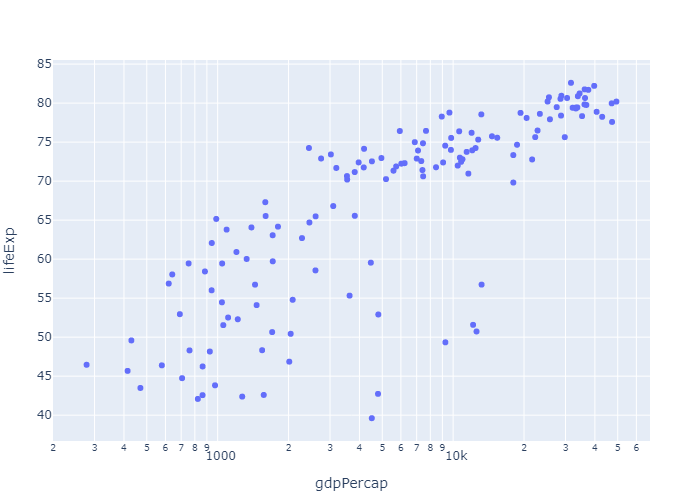

In [52]:
v
plot(

    df07,

    x=:gdpPercap, y=:lifeExp, hover_name=:county, mode="markers",

    Layout(xaxis_type="log")

)

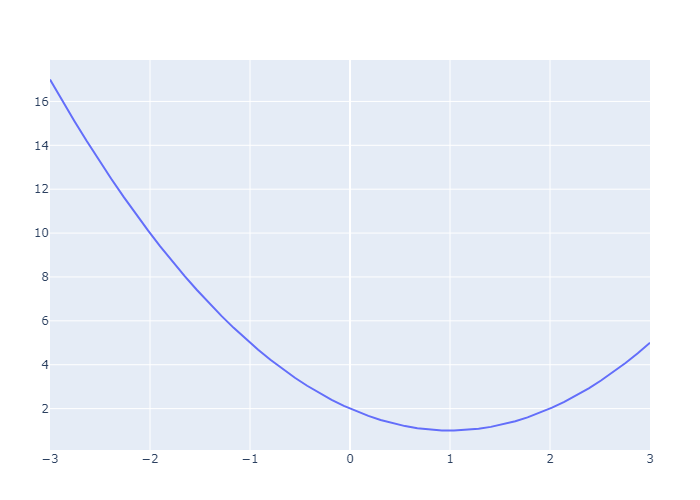

In [72]:
f(x) = x^2 - 2x + 2
plot(f, -3, 3)

In [25]:
v_range = LinRange(.1, c/10, 10^8)#Int(floor(c/10)))
s_range = [S_estimate_num(v_val) for v_val in v_range]

MethodError: MethodError: no method matching LinRange(::Float64, ::Float64, ::Float64)
Closest candidates are:
  LinRange(::Any, ::Any, !Matched::Integer) at C:\Users\engin\AppData\Local\Programs\Julia-1.7.2\share\julia\base\range.jl:521

In [ ]:
S_estimate_range = [S_estimate.subs(v, v_value) 
                    for v_value in v_range]

In [12]:
S_estimate_num = convert(Function, S_estimate)
S_estimate_num(c/10)

-5.717875192147298e-10

In [17]:
a = LinRange(.2, 2, 10)


10-element Vector{Float64}:
 1.952574363277368e8
 4.689877305638599e7
 2.0345878695348807e7
 1.1245796757709444e7
 7.09864097136643e6
 4.873626782109623e6
 3.5458472836315646e6
 2.6917250628305976e6
 2.1107207430684157e6
 1.698036801819679e6

In [28]:
plot(v_range, s_range,
Layout(yaxis_type="log", xaxis_type = "log"))

In [ ]:
plot(S_estimate_num, .1, Int(floor(c/10)),
Layout(yaxis_type="log", xaxis_type = "log")
)